# **TIC - TAC - TOE Problem**

### **Problem Description**

<small style="font-size: 15px;">

**State Representation:** 

Each state is represented by a grid of size 3x3 where each cell holds,
- "X" for Player X’s move.

- "O" for Player O’s move.

- Empty string for an unoccupied cell.

**Initial State:**

An empty board of size 3x3 and no moves have been made.

**Goal State:**  

The board reaches a terminal condition when,
- One player "X" or "O" has a full row, column, or diagonal.

- The board is full.

**Actions:**  

A valid action is placing the player’s symbol "X" or "O" in any empty cell.

**Transition Model:**  

When a player takes an action by placing their symbol in an empty cell, a new board state is created with the updated move.

**Path Cost:**  

Each move has a uniform cost 1, so the total path cost is the number of moves taken.

**Solution Approach:**  

The Tic Tac Toe simulation operates on an 3×3 grid, where two players alternately place their respective symbols "X" and "O" on empty cells, aiming to form a complete row, column, or diagonal. The game concludes when a player achieves this objective or when all cells are filled, resulting in a draw. The implementation supports Player vs Player and Player vs Computer modes, allowing for interactive gameplay. In the Player vs Computer mode, the AI utilizes the Minimax algorithm with Alpha-Beta Pruning, an optimization technique that evaluates potential moves by exploring future game states while discarding unproductive branches. The AI follows a recursive decision-making strategy, to prioritize winning paths and block the opponent strategically. The board updates dynamically with each move, and the game detects winning conditions, ensuring a structured and fair competition. The simulation provides an interactive experience, where players compete either manually or against an intelligent AI that makes calculated decisions to secure victory or force a draw. 

</small>

### **Implementation**

##### **Using Min Max Algorithm**

Choose your mode: Enter 1 to Play with a friend, Enter 2 to play with the computer:
2
Board of size 3 is created.


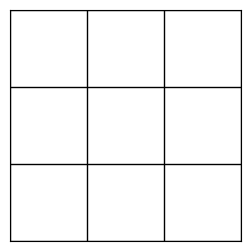

Press Enter to know player assignments:
Player 1: O
Player 2: X
Press Enter to know who plays first:
Computer will play first.


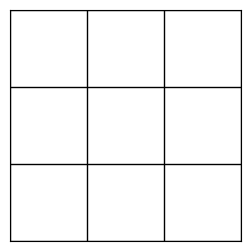

Computer is making its move.


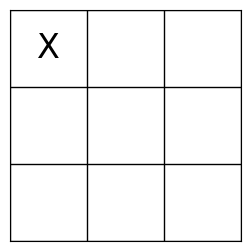

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'O':
5


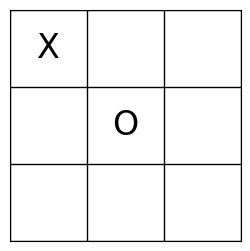

Computer is making its move.


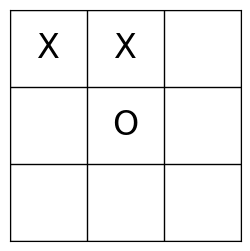

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'O':
3


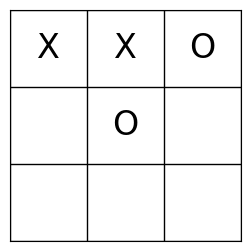

Computer is making its move.


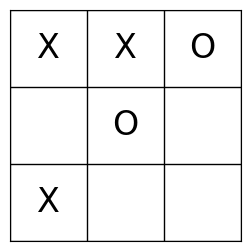

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'O':
6


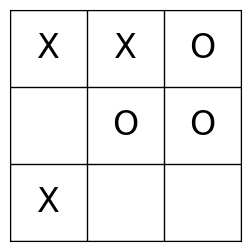

Computer is making its move.


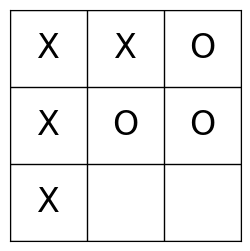

Player 2 wins the game.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(np.ones((size, size, 3)), interpolation='nearest')
    for i in range(size):
        for j in range(size):
            if board_matrix[i][j] != "":
                ax.text(j, i, board_matrix[i][j], ha='center', va='center', fontsize=24, color="black")
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    return [["" for _ in range(size)] for _ in range(size)]
def assign_players():
    symbols = ["X", "O"]
    random.shuffle(symbols)
    return {"Player 1": symbols[0], "Player 2": symbols[1]}
def decide_first_player(player_symbols):
    return random.choice(list(player_symbols.keys()))
def check_winner(board_matrix, size, symbol):
    for i in range(size):
        if all(cell == symbol for cell in board_matrix[i]):
            return True
        if all(row[i] == symbol for row in board_matrix):
            return True
    if all(board_matrix[i][i] == symbol for i in range(size)):
        return True
    if all(board_matrix[i][size - i - 1] == symbol for i in range(size)):
        return True
    return False
def is_board_full(board_matrix):
    return all(all(cell != "" for cell in row) for row in board_matrix)
def minimax(board_matrix, depth, is_maximizing, size, ai_symbol, human_symbol):
    if check_winner(board_matrix, size, ai_symbol):
        return 10 - depth
    if check_winner(board_matrix, size, human_symbol):
        return depth - 10
    if is_board_full(board_matrix):
        return 0
    if is_maximizing:
        max_eval = -float('inf')
        for i in range(size):
            for j in range(size):
                if board_matrix[i][j] == "":
                    board_matrix[i][j] = ai_symbol
                    eval = minimax(board_matrix, depth + 1, False, size, ai_symbol, human_symbol)
                    board_matrix[i][j] = ""
                    max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for i in range(size):
            for j in range(size):
                if board_matrix[i][j] == "":
                    board_matrix[i][j] = human_symbol
                    eval = minimax(board_matrix, depth + 1, True, size, ai_symbol, human_symbol)
                    board_matrix[i][j] = ""
                    min_eval = min(min_eval, eval)
        return min_eval
def best_move(board_matrix, size, ai_symbol, human_symbol):
    best_val = -float('inf')
    best_move = None
    for i in range(size):
        for j in range(size):
            if board_matrix[i][j] == "":
                board_matrix[i][j] = ai_symbol
                move_val = minimax(board_matrix, 0, False, size, ai_symbol, human_symbol)
                board_matrix[i][j] = ""
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move
try:
    print("Choose your mode: Enter 1 to Play with a friend, Enter 2 to play with the computer:")
    mode = int(input())
    print(mode)
    if mode not in [1, 2]:
        print("Invalid mode. Please restart the game and choose 1 or 2.")
    else:
        size = 3
        board_matrix = create_empty_board(size)
        print(f"Board of size {size} is created.")
        display_board(board_matrix, size)
        print("Press Enter to know player assignments:")
        input()
        player_symbols = assign_players()
        for player, symbol in player_symbols.items():
            print(f"{player}: {symbol}")
        print("Press Enter to know who plays first:")
        input()
        current_player = decide_first_player(player_symbols)
        if mode == 2:
            if current_player == "Player 1":
                print("You will play first.")
            else:
                print("Computer will play first.")
        else:
            print(f"{current_player} will play first.")
        while True:
            try:
                display_board(board_matrix, size)
                if mode == 2 and current_player == "Player 2":
                    print("Computer is making its move.")
                    row, col = best_move(board_matrix, size, player_symbols["Player 2"], player_symbols["Player 1"])
                else:
                    print(f"{current_player}, it's your turn to make a move.")
                    print(f"Enter the cell number (1-{size*size}) to place '{player_symbols[current_player]}':")
                    move = int(input())
                    print(move)
                    if move < 1 or move > size * size:
                         print("Invalid cell number. Please try again.")
                         continue
                    row = (move - 1) // size
                    col = (move - 1) % size
                    if board_matrix[row][col] != "":
                        print("Cell already occupied. Please try again.")
                        continue
                board_matrix[row][col] = player_symbols[current_player]
                if check_winner(board_matrix, size, player_symbols[current_player]):
                    display_board(board_matrix, size)
                    print(f"{current_player} wins the game.")
                    break
                if is_board_full(board_matrix):
                    display_board(board_matrix, size)
                    print("It's a tie!")
                    break
                current_player = "Player 1" if current_player == "Player 2" else "Player 2"
            except ValueError:
                    print("Invalid input. Please enter a valid cell number.")
except ValueError:
    print("Invalid input. Please enter a valid integer.")

##### **Using Alpha Beta Pruning Algorithm**

Choose your mode: Enter 1 to Play with a friend, Enter 2 to play with the computer:
2
Board of size 3 is created.


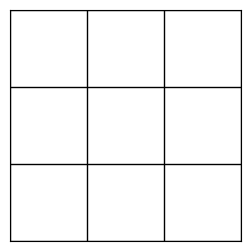

Press Enter to know player assignments:
Player 1: X
Player 2: O
Press Enter to know who plays first:
Computer will play first.


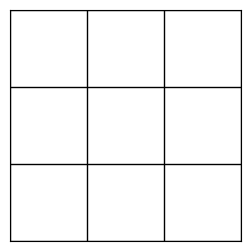

Computer is making its move.


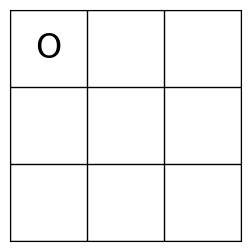

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'X':
5


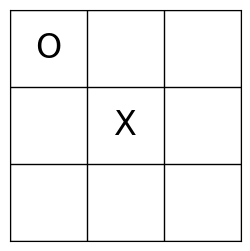

Computer is making its move.


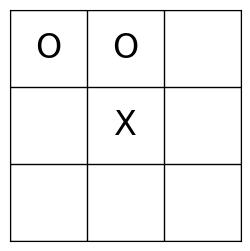

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'X':
3


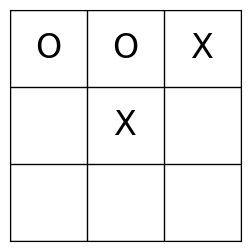

Computer is making its move.


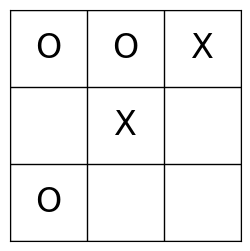

Player 1, it's your turn to make a move.
Enter the cell number (1-9) to place 'X':
6


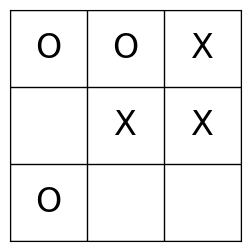

Computer is making its move.


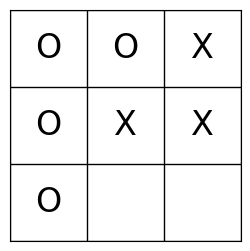

Player 2 wins the game.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(np.ones((size, size, 3)), interpolation='nearest')
    for i in range(size):
        for j in range(size):
            if board_matrix[i][j] != "":
                ax.text(j, i, board_matrix[i][j], ha='center', va='center', fontsize=24, color="black")
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    return [["" for _ in range(size)] for _ in range(size)]
def assign_players():
    symbols = ["X", "O"]
    random.shuffle(symbols)
    return {"Player 1": symbols[0], "Player 2": symbols[1]}
def decide_first_player(player_symbols):
    return random.choice(list(player_symbols.keys()))
def check_winner(board_matrix, size, symbol):
    for i in range(size):
        if all(cell == symbol for cell in board_matrix[i]):
            return True
        if all(row[i] == symbol for row in board_matrix):
            return True
    if all(board_matrix[i][i] == symbol for i in range(size)):
        return True
    if all(board_matrix[i][size - i - 1] == symbol for i in range(size)):
        return True
    return False
def is_board_full(board_matrix):
    return all(all(cell != "" for cell in row) for row in board_matrix)
def alpha_beta(board_matrix, depth, is_maximizing, size, ai_symbol, human_symbol, alpha, beta):
    if check_winner(board_matrix, size, ai_symbol):
        return 10 - depth
    if check_winner(board_matrix, size, human_symbol):
        return depth - 10
    if is_board_full(board_matrix):
        return 0
    if is_maximizing:
        max_eval = -float('inf')
        for i in range(size):
            for j in range(size):
                if board_matrix[i][j] == "":
                    board_matrix[i][j] = ai_symbol
                    eval = alpha_beta(board_matrix, depth + 1, False, size, ai_symbol, human_symbol, alpha, beta)
                    board_matrix[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break
        return max_eval
    else:
        min_eval = float('inf')
        for i in range(size):
            for j in range(size):
                if board_matrix[i][j] == "":
                    board_matrix[i][j] = human_symbol
                    eval = alpha_beta(board_matrix, depth + 1, True, size, ai_symbol, human_symbol, alpha, beta)
                    board_matrix[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break
        return min_eval
def best_move(board_matrix, size, ai_symbol, human_symbol):
    best_val = -float('inf')
    best_move = None
    for i in range(size):
        for j in range(size):
            if board_matrix[i][j] == "":
                board_matrix[i][j] = ai_symbol
                move_val = alpha_beta(board_matrix, 0, False, size, ai_symbol, human_symbol, -float('inf'), float('inf'))
                board_matrix[i][j] = ""
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move
try:
    print("Choose your mode: Enter 1 to Play with a friend, Enter 2 to play with the computer:")
    mode = int(input())
    print(mode)
    if mode not in [1, 2]:
        print("Invalid mode. Please restart the game and choose 1 or 2.")
    else: 
        size = 3
        board_matrix = create_empty_board(size)
        print(f"Board of size {size} is created.")
        display_board(board_matrix, size)
        print("Press Enter to know player assignments:")
        input()
        player_symbols = assign_players()
        for player, symbol in player_symbols.items():
            print(f"{player}: {symbol}")
        print("Press Enter to know who plays first:")
        input()
        current_player = decide_first_player(player_symbols)
        if mode == 2:
            if current_player == "Player 1":
                print("You will play first.")
            else:
                print("Computer will play first.")
        else:
            print(f"{current_player} will play first.")
        while True:
            try:
                display_board(board_matrix, size)
                if mode == 2 and current_player == "Player 2":
                    print("Computer is making its move.")
                    row, col = best_move(board_matrix, size, player_symbols["Player 2"], player_symbols["Player 1"])
                else:
                    print(f"{current_player}, it's your turn to make a move.")
                    print(f"Enter the cell number (1-{size*size}) to place '{player_symbols[current_player]}':")
                    move = int(input())
                    print(move)
                    if move < 1 or move > size * size:
                        print("Invalid cell number. Please try again.")
                        continue
                    row = (move - 1) // size
                    col = (move - 1) % size
                    if board_matrix[row][col] != "":
                        print("Cell already occupied. Please try again.")
                        continue
                board_matrix[row][col] = player_symbols[current_player]
                if check_winner(board_matrix, size, player_symbols[current_player]):
                    display_board(board_matrix, size)
                    print(f"{current_player} wins the game.")
                    break
                if is_board_full(board_matrix):
                    display_board(board_matrix, size)
                    print("It's a tie!")
                current_player = "Player 1" if current_player == "Player 2" else "Player 2"
            except ValueError:
                    print("Invalid input. Please enter a valid cell number.")
except ValueError:
    print("Invalid input. Please enter a valid integer.")